In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
benchmark_results = pd.read_csv('../temp-bench.csv')
benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
852,7,remove,2000,0.6,0.0,zipf,0,0,mpi_priority_frontier,3.0,155,0,3407,0
1008,37,addremove,5200,0.4,0.0,zipf,0,0,sequential_frontier,NaN,605,0,17242,0
1063,76,independent,8400,1.0,0.0,zipf,0,1,sequential_frontier,NaN,805,0,294317,0
1389,33,remove,5200,0.2,0.0,zipf,0,1,mpi_priority_frontier,1.0,669,0,7421,0
1327,84,remove,10000,0.4,0.0,zipf,0,1,mpi_priority_frontier,6.0,1991,0,18619,0


In [3]:
def prepare_plot_data(filter_cb, index):
    temp = benchmark_results.copy()
    temp['mpi_procs'] = temp['mpi_procs'].fillna('sequential')
    temp = temp.groupby(['generation_config_i', 'mpi_procs']).min()
    temp = filter_cb(temp)
    temp = temp.set_index(index, append=True)
    temp = temp.unstack('mpi_procs')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()
    return temp

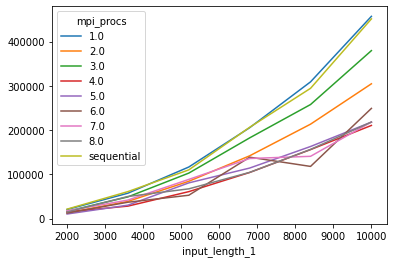

In [4]:
temp = prepare_plot_data(
    lambda temp: temp[temp['input_strategy'] == 'independent'],
    'input_length_1',
)
temp.plot();

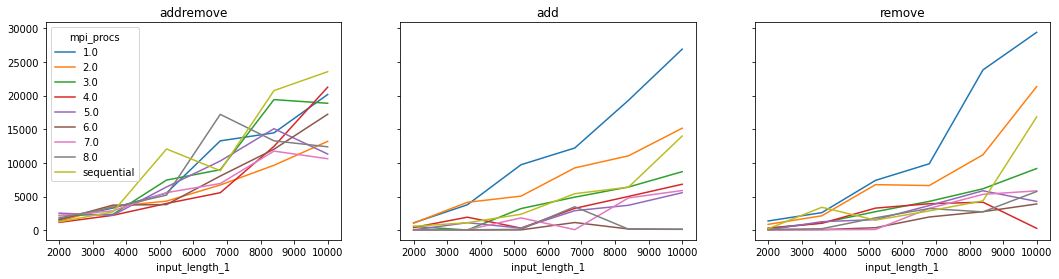

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = prepare_plot_data(
        lambda temp: temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)],
        'input_length_1',
    )
    temp.plot(ax=ax[input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);

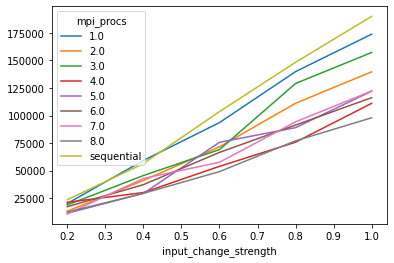

In [6]:
temp = prepare_plot_data(
    lambda temp: temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)],
    'input_change_strength',
)
temp.plot();